# Imports

In [27]:
%run ../Imports_Functions.ipynb

# Data

In [5]:
data = pd.read_csv('../D_1_10/Data/laptopData_cleaned.csv')
data.head()

,Company,TypeName,OpSys,RAM_GB,GPU,GPU_Brand,CPU_model,CPU_GHz,Weight_KG,Price_Rupee,ScreenRes_width,ScreenRes_height,Inches,TouchScreen,Memory_Type1,Memory_Size1_GB,Memory_Type2,Memory_Size2_GB
0,Apple,Ultrabook,macOS,8,Intel Iris Plus Graphics 640,Intel,Intel Core i5,2.3,1.37,71378.6832,2560,1600,13.3,No,SSD,128,No second memory,0
1,Apple,Ultrabook,macOS,8,Intel HD Graphics 6000,Intel,Intel Core i5,1.8,1.34,47895.5232,1440,900,13.3,No,Flash Storage,128,No second memory,0
2,HP,Notebook,No OS,8,Intel HD Graphics 620,Intel,Intel Core i5 7200U,2.5,1.86,30636.0000,1920,1080,15.6,No,SSD,256,No second memory,0
3,Apple,Ultrabook,macOS,16,AMD Radeon Pro 455,AMD,Intel Core i7,2.7,1.83,135195.3360,2880,1800,15.4,No,SSD,512,No second memory,0
4,Apple,Ultrabook,macOS,8,Intel Iris Plus Graphics 650,Intel,Intel Core i5,3.1,1.37,96095.8080,2560,1600,13.3,No,SSD,256,No second memory,0


In [6]:
data.columns

Index(['Company', 'TypeName', 'OpSys', 'RAM_GB', 'GPU', 'GPU_Brand',
       'CPU_model', 'CPU_GHz', 'Weight_KG', 'Price_Rupee', 'ScreenRes_width',
       'ScreenRes_height', 'Inches', 'TouchScreen', 'Memory_Type1',
       'Memory_Size1_GB', 'Memory_Type2', 'Memory_Size2_GB'],
      dtype='object')

In [7]:
with open('../Results/regressions.pkl', 'rb') as f:
    results = pickle.load(f)

In [8]:
results

{'lin_reg_Price_vs_Weight': {'model': <function scipy.stats._stats_py.linregress(x, y=None, alternative='two-sided')>,
  'slope': np.float64(3.827186534615372e-06),
  'intercept': np.float64(1.8486478813549148),
  'r_value': np.float64(0.03122332399931279),
  'p_value': np.float64(2.2479309247907857e-10),
  'std_err': np.float64(5.984406531177486e-07)},
 'lin_reg_Price_vs_RAM': {'model': <function scipy.stats._stats_py.linregress(x, y=None, alternative='two-sided')>,
  'slope': np.float64(0.00010250643606528087),
  'intercept': np.float64(2.324460610986348),
  'r_value': np.float64(0.471647088964016),
  'p_value': np.float64(5.108313310262993e-178),
  'std_err': np.float64(3.0456065397989975e-06)}}

# 1) Simple linear Regression

## Experimental Regressions

In [12]:
lr_data = data[['Price_Rupee', 'Weight_KG']]
lr_data.head()

,Price_Rupee,Weight_KG
0,71378.6832,1.37
1,47895.5232,1.34
2,30636.0000,1.86
3,135195.3360,1.83
4,96095.8080,1.37


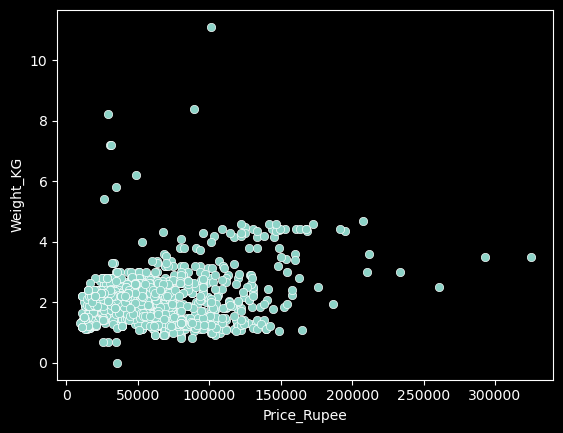

In [14]:
sns.scatterplot(data=lr_data, x='Price_Rupee', y='Weight_KG')
# plt.scatter(lr_data['Price_Rupee'], lr_data['Weight_KG'])
plt.show()

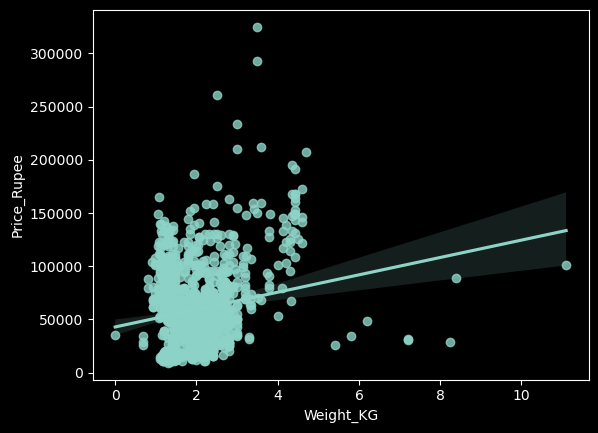

In [21]:
sns.regplot(data=lr_data, x='Weight_KG', y='Price_Rupee')
plt.show()

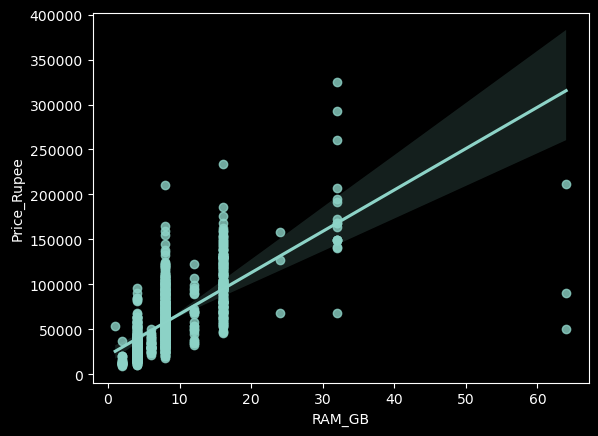

In [22]:
sns.regplot(data=data, x='RAM_GB', y='Price_Rupee')
plt.show()

## Parameters

In [18]:
res = linreg(data, x='Price_Rupee', y='Weight_KG', model=linregress, results=results,
    col_name='lin_reg_Price_vs_Weight')
res

{'lin_reg_Price_vs_Weight': {'model': <function scipy.stats._stats_py.linregress(x, y=None, alternative='two-sided')>,
  'slope': np.float64(3.827186534615372e-06),
  'intercept': np.float64(1.8486478813549148),
  'r_value': np.float64(0.03122332399931279),
  'p_value': np.float64(2.2479309247907857e-10),
  'std_err': np.float64(5.984406531177486e-07)},
 'lin_reg_Price_vs_RAM': {'model': <function scipy.stats._stats_py.linregress(x, y=None, alternative='two-sided')>,
  'slope': np.float64(0.00010250643606528087),
  'intercept': np.float64(2.324460610986348),
  'r_value': np.float64(0.471647088964016),
  'p_value': np.float64(5.108313310262993e-178),
  'std_err': np.float64(3.0456065397989975e-06)}}

In [56]:
res = linreg(data, x='Price_Rupee', y='RAM_GB', model=linregress, results=res,
    col_name='lin_reg_Price_vs_RAM')
res

{'lin_reg_Price_vs_Weight': {'model': <function scipy.stats._stats_py.linregress(x, y=None, alternative='two-sided')>,
  'slope': np.float64(3.827186534615372e-06),
  'intercept': np.float64(1.8486478813549148),
  'r_value': np.float64(0.03122332399931279),
  'p_value': np.float64(2.2479309247907857e-10),
  'std_err': np.float64(5.984406531177486e-07)},
 'lin_reg_Price_vs_RAM': {'model': <function scipy.stats._stats_py.linregress(x, y=None, alternative='two-sided')>,
  'slope': np.float64(0.00010250643606528087),
  'intercept': np.float64(2.324460610986348),
  'r_value': np.float64(0.471647088964016),
  'p_value': np.float64(5.108313310262993e-178),
  'std_err': np.float64(3.0456065397989975e-06)}}

In [57]:
with open('../Results/regressions.pkl', 'wb') as f:
    pickle.dump(res, f)

# 2) Multiple Linear Regression

In [7]:
data.columns

Index(['Company', 'TypeName', 'OpSys', 'RAM_GB', 'GPU', 'GPU_Brand',
       'CPU_model', 'CPU_GHz', 'Weight_KG', 'Price_Rupee', 'ScreenRes_width',
       'ScreenRes_height', 'Inches', 'TouchScreen', 'Memory_Type1',
       'Memory_Size1_GB', 'Memory_Type2', 'Memory_Size2_GB'],
      dtype='object')

In [11]:
X = ['RAM_GB', 'CPU_GHz', 'GPU_Brand', 'TouchScreen']
y = 'Price_Rupee'

In [23]:
res = results_func(data, X, y, model=LinearRegression, results=results, col_name='multi_lin_reg')

In [25]:
res['multi_lin_reg']

{'model': sklearn.linear_model._base.LinearRegression,
 'coefficients': {'Feature': Index(['RAM_GB', 'CPU_GHz', 'GPU_Brand_ARM', 'GPU_Brand_Intel',
         'GPU_Brand_Nvidia', 'TouchScreen_Yes'],
        dtype='object'),
  'Coefficient': array([ 4172.96112618, 17903.83942573,  1252.46484151, 16164.83982902,
         15910.3961871 , 13160.58777179])},
 'Intercept': np.float64(-31801.05596945186),
 'rsquared': 0.5046885184495935,
 'mae': 17763.840757522652,
 'mse': 716444436.1867853,
 'rmse': 26766.47971225924}

# 3) Polynomial Regression

In [26]:
results.keys()

dict_keys(['lin_reg_Price_vs_Weight', 'lin_reg_Price_vs_RAM', 'multi_lin_reg'])

## 3.1) Price vs. RAM

### Code Testing

In [10]:
X = data[['RAM_GB']]
y = data['Price_Rupee']

In [11]:
# --- Train/Test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Models ---
lin_model = LinearRegression()
poly2_model = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin", LinearRegression())
])

In [12]:
# Fit
lin_model.fit(X_train, y_train)
poly2_model.fit(X_train, y_train)

# Predict
y_pred_lin = lin_model.predict(X_test)
y_pred_poly2 = poly2_model.predict(X_test)

In [13]:
# --- Metrics helper ---
def report(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} -> MAE: {mae:,.2f} | RMSE: {rmse:,.2f} | R²: {r2:.4f}")

print("=== Test Performance ===")
report("Linear", y_test, y_pred_lin)
report("Polynomial (deg=2)", y_test, y_pred_poly2)

=== Test Performance ===
Linear -> MAE: 19,127.15 | RMSE: 29,841.69 | R²: 0.3843
Polynomial (deg=2) -> MAE: 16,938.74 | RMSE: 25,218.69 | R²: 0.5603


c:\Users\benjf\anaconda3\envs\projects\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\benjf\anaconda3\envs\projects\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


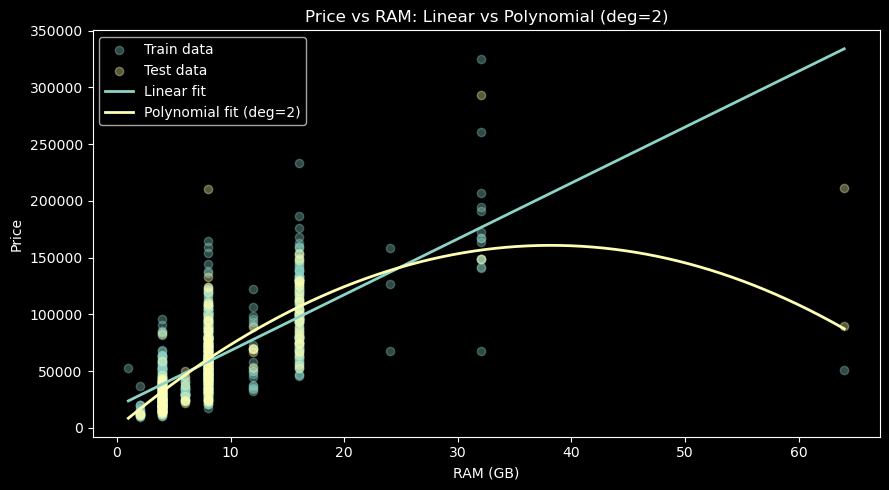


Linear model:
Intercept: 18,932.63
Slope (RAM): 4,924.12

Polynomial (deg=2) coefficients:
Intercept: 269.89
    feature         coef
0    RAM_GB  8415.006453
1  RAM_GB^2  -110.208313


In [14]:
# --- Visualization ---
# Create smooth RAM grid for plotting fitted curves
ram_grid = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
lin_curve = lin_model.predict(ram_grid)
poly2_curve = poly2_model.predict(ram_grid)

plt.figure(figsize=(9, 5))
plt.scatter(X_train, y_train, alpha=0.35, label="Train data")
plt.scatter(X_test, y_test, alpha=0.35, label="Test data")
plt.plot(ram_grid, lin_curve, linewidth=2, label="Linear fit")
plt.plot(ram_grid, poly2_curve, linewidth=2, label="Polynomial fit (deg=2)")
plt.xlabel("RAM (GB)")
plt.ylabel("Price")
plt.title("Price vs RAM: Linear vs Polynomial (deg=2)")
plt.legend()
plt.tight_layout()
plt.show()

# --- Optional: print model coefficients ---
print("\nLinear model:")
print(f"Intercept: {lin_model.intercept_:,.2f}")
print(f"Slope (RAM): {lin_model.coef_[0]:,.2f}")

# For polynomial: coefficients correspond to [RAM, RAM^2]
lin = poly2_model.named_steps['lin']
poly = poly2_model.named_steps['poly']
feature_names = poly.get_feature_names_out(['RAM_GB'])
coef_table = pd.DataFrame({'feature': feature_names, 'coef': lin.coef_})
print("\nPolynomial (deg=2) coefficients:")
print(f"Intercept: {lin.intercept_:,.2f}")
print(coef_table)

In [20]:
# testing result function with params input
params = {
    'X': 'RAM_GB',
    'y': 'Price_Rupee',
    'Model': PolynomialFeatures,
    'col_name': 'test',
    'pol_degree': 2
}


In [28]:
test_dict = results_func(data, results, params)


In [29]:
test_dict

{'degree': 2, 'include_bias': True, 'interaction_only': False, 'order': 'C'}

# 4) Regularized Regression

# 5) Log-Transformed Regression

# 6) Interaction Models

# 7) Categorical Encoding Regressions

# 8) Tree-Based Regression (beyond OLS)

# 9) Quantile Regression

# 10) Stepwise Model Comparison